In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [17]:
# grab required data
pa_2004 = pd.read_csv('../data/property_assessment_2004.csv', low_memory=False)[['PID', 'LU']]
pa_2005 = pd.read_csv('../data/property_assessment_2005.csv', low_memory=False)[['PID', 'LU']]
pa_2006 = pd.read_csv('../data/property_assessment_2006.csv', low_memory=False)[['PID', 'LU']]
pa_2007 = pd.read_csv('../data/property_assessment_2007.csv', low_memory=False)[['PID', 'LU']]
pa_2008 = pd.read_csv('../data/property_assessment_2008.csv', low_memory=False)[['PID', 'LU']]
pa_2009 = pd.read_csv('../data/property_assessment_2009.csv', low_memory=False)[['PID', 'LU']]
pa_2010 = pd.read_csv('../data/property_assessment_2010.csv', low_memory=False)[['PID', 'LU']]
pa_2011 = pd.read_csv('../data/property_assessment_2011.csv', low_memory=False)[['PID', 'LU']]
pa_2012 = pd.read_csv('../data/property_assessment_2012.csv', low_memory=False)[['PID', 'LU']]
pa_2013 = pd.read_csv('../data/property_assessment_2013.csv', low_memory=False)[['PID', 'LU']]
pa_2014 = pd.read_csv('../data/property_assessment_2014.csv', low_memory=False)[['Parcel_ID', 'LU']]
pa_2015 = pd.read_csv('../data/property_assessment_2015.csv', low_memory=False)[['PID', 'LU']]
pa_2016 = pd.read_csv('../data/property_assessment_2016.csv', low_memory=False)[['PID', 'LU']]
pa_2017 = pd.read_csv('../data/property_assessment_2017.csv', low_memory=False)[['PID', 'LU']]
pa_2018 = pd.read_csv('../data/property_assessment_2018.csv', low_memory=False)[['PID', 'LU']]
pa_2019 = pd.read_csv('../data/property_assessment_2019.csv', low_memory=False)[['PID', 'LU']]
pa_2020 = pd.read_csv('../data/property_assessment_2020.csv', low_memory=False)[['PID', 'LU']]
pa_2021 = pd.read_csv('../data/property_assessment_2021.csv', low_memory=False)[['PID', 'LU']]
pa_2022 = pd.read_csv('../data/property_assessment_2022.csv', low_memory=False)[['PID', 'LU']]
pa_2023 = pd.read_csv('../data/property_assessment_2023.csv', low_memory=False)[['PID', 'LU']]
pa_2024 = pd.read_csv('../data/property_assessment_2024.csv', low_memory=False)[['PID', 'LU']]


In [18]:
# preprocessing
# fix 2014 PID column name to match all others
pa_2014.rename(columns={'Parcel_ID': 'PID'}, inplace=True)

# remove underscore from PID in years 2014, 2015, 2016, and 2017 and convert to type int64
pa_2014['PID'] = pa_2014['PID'].astype(str).str.replace('_', '').astype(int)
pa_2015['PID'] = pa_2015['PID'].astype(str).str.replace('_', '').astype(int)
pa_2016['PID'] = pa_2016['PID'].astype(str).str.replace('_', '').astype(int)
pa_2017['PID'] = pa_2017['PID'].astype(str).str.replace('_', '').astype(int)

## Find how many residental units have been added per year

In [19]:
# grab all multi family homes in 2004
units_04 = pa_2004[(pa_2004['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A']))]

# then, grab all multi family homes in 2005 that are not in 2004
units_05 = pa_2005[(~(pa_2005.PID.isin(units_04.PID))) & ((pa_2005['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

# then grab all multi family homes in 2006 that are not in 2004 or in 2005
units_06 = pa_2006[(~(pa_2006.PID.isin(units_05.PID) | pa_2006.PID.isin(units_04.PID))) & ((pa_2006['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

# then grab all multi family homes in 2007 that are not in 2004 or in 2005 or in 2006
units_07 = pa_2007[(~(pa_2007.PID.isin(units_06.PID) | pa_2007.PID.isin(units_05.PID) | pa_2007.PID.isin(units_04.PID))) & ((pa_2007['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

# continue as before
units_08 = pa_2008[(~(pa_2008.PID.isin(units_07.PID) | pa_2008.PID.isin(units_06.PID) | pa_2008.PID.isin(units_05.PID) | pa_2008.PID.isin(units_04.PID))) & ((pa_2008['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

units_09 = pa_2009[(~(pa_2009.PID.isin(units_08.PID) | pa_2009.PID.isin(units_07.PID) | pa_2009.PID.isin(units_06.PID) | pa_2009.PID.isin(units_05.PID) | pa_2009.PID.isin(units_04.PID))) & ((pa_2009['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

units_10 = pa_2010[(~(pa_2010.PID.isin(units_09.PID) | pa_2010.PID.isin(units_08.PID) | pa_2010.PID.isin(units_07.PID) | pa_2010.PID.isin(units_06.PID) | pa_2010.PID.isin(units_05.PID) | pa_2010.PID.isin(units_04.PID))) & ((pa_2010['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

units_11 = pa_2011[(~(pa_2011.PID.isin(units_10.PID) | pa_2011.PID.isin(units_09.PID) | pa_2011.PID.isin(units_08.PID) | pa_2011.PID.isin(units_07.PID) | pa_2011.PID.isin(units_06.PID) | pa_2011.PID.isin(units_05.PID) | pa_2011.PID.isin(units_04.PID))) & ((pa_2011['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

units_12 = pa_2012[(~(pa_2012.PID.isin(units_11.PID) | pa_2012.PID.isin(units_10.PID) | pa_2012.PID.isin(units_09.PID) | pa_2012.PID.isin(units_08.PID) | pa_2012.PID.isin(units_07.PID) | pa_2012.PID.isin(units_06.PID) | pa_2012.PID.isin(units_05.PID) | pa_2012.PID.isin(units_04.PID))) & ((pa_2012['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

units_13 = pa_2013[(~(pa_2013.PID.isin(units_12.PID) | pa_2013.PID.isin(units_11.PID) | pa_2013.PID.isin(units_10.PID) | pa_2013.PID.isin(units_09.PID) | pa_2013.PID.isin(units_08.PID) | pa_2013.PID.isin(units_07.PID) | pa_2013.PID.isin(units_06.PID) | pa_2013.PID.isin(units_05.PID) | pa_2013.PID.isin(units_04.PID))) & ((pa_2013['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

units_14 = pa_2014[(~(pa_2014.PID.isin(units_13.PID) | pa_2014.PID.isin(units_12.PID) | pa_2014.PID.isin(units_11.PID) | pa_2014.PID.isin(units_10.PID) | pa_2014.PID.isin(units_09.PID) | pa_2014.PID.isin(units_08.PID) | pa_2014.PID.isin(units_07.PID) | pa_2014.PID.isin(units_06.PID) | pa_2014.PID.isin(units_05.PID) | pa_2014.PID.isin(units_04.PID))) & ((pa_2014['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

units_15 = pa_2015[(~(pa_2015.PID.isin(units_14.PID) | pa_2015.PID.isin(units_13.PID) | pa_2015.PID.isin(units_12.PID) | pa_2015.PID.isin(units_11.PID) | pa_2015.PID.isin(units_10.PID) | pa_2015.PID.isin(units_09.PID) | pa_2015.PID.isin(units_08.PID) | pa_2015.PID.isin(units_07.PID) | pa_2015.PID.isin(units_06.PID) | pa_2015.PID.isin(units_05.PID) | pa_2015.PID.isin(units_04.PID))) & ((pa_2015['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

units_16 = pa_2016[(~(pa_2016.PID.isin(units_15.PID) | pa_2016.PID.isin(units_14.PID) | pa_2016.PID.isin(units_13.PID) | pa_2016.PID.isin(units_12.PID) | pa_2016.PID.isin(units_11.PID) | pa_2016.PID.isin(units_10.PID) | pa_2016.PID.isin(units_09.PID) | pa_2016.PID.isin(units_08.PID) | pa_2016.PID.isin(units_07.PID) | pa_2016.PID.isin(units_06.PID) | pa_2016.PID.isin(units_05.PID) | pa_2016.PID.isin(units_04.PID))) & ((pa_2016['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

units_17 = pa_2017[(~(pa_2017.PID.isin(units_16.PID) | pa_2017.PID.isin(units_15.PID) | pa_2017.PID.isin(units_14.PID) | pa_2017.PID.isin(units_13.PID) | pa_2017.PID.isin(units_12.PID) | pa_2017.PID.isin(units_11.PID) | pa_2017.PID.isin(units_10.PID) | pa_2017.PID.isin(units_09.PID) | pa_2017.PID.isin(units_08.PID) | pa_2017.PID.isin(units_07.PID) | pa_2017.PID.isin(units_06.PID) | pa_2017.PID.isin(units_05.PID) | pa_2017.PID.isin(units_04.PID))) & ((pa_2017['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

units_18 = pa_2018[(~(pa_2018.PID.isin(units_17.PID) | pa_2018.PID.isin(units_16.PID) | pa_2018.PID.isin(units_15.PID) | pa_2018.PID.isin(units_14.PID) | pa_2018.PID.isin(units_13.PID) | pa_2018.PID.isin(units_12.PID) | pa_2018.PID.isin(units_11.PID) | pa_2018.PID.isin(units_10.PID) | pa_2018.PID.isin(units_09.PID) | pa_2018.PID.isin(units_08.PID) | pa_2018.PID.isin(units_07.PID) | pa_2018.PID.isin(units_06.PID) | pa_2018.PID.isin(units_05.PID) | pa_2018.PID.isin(units_04.PID))) & ((pa_2018['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

units_19 = pa_2019[(~(pa_2019.PID.isin(units_18.PID) | pa_2019.PID.isin(units_17.PID) | pa_2019.PID.isin(units_16.PID) | pa_2019.PID.isin(units_15.PID) | pa_2019.PID.isin(units_14.PID) | pa_2019.PID.isin(units_13.PID) | pa_2019.PID.isin(units_12.PID) | pa_2019.PID.isin(units_11.PID) | pa_2019.PID.isin(units_10.PID) | pa_2019.PID.isin(units_09.PID) | pa_2019.PID.isin(units_08.PID) | pa_2019.PID.isin(units_07.PID) | pa_2019.PID.isin(units_06.PID) | pa_2019.PID.isin(units_05.PID) | pa_2019.PID.isin(units_04.PID))) & ((pa_2019['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

units_20 = pa_2020[(~(pa_2020.PID.isin(units_19.PID) | pa_2020.PID.isin(units_18.PID) | pa_2020.PID.isin(units_17.PID) | pa_2020.PID.isin(units_16.PID) | pa_2020.PID.isin(units_15.PID) | pa_2020.PID.isin(units_14.PID) | pa_2020.PID.isin(units_13.PID) | pa_2020.PID.isin(units_12.PID) | pa_2020.PID.isin(units_11.PID) | pa_2020.PID.isin(units_10.PID) | pa_2020.PID.isin(units_09.PID) | pa_2020.PID.isin(units_08.PID) | pa_2020.PID.isin(units_07.PID) | pa_2020.PID.isin(units_06.PID) | pa_2020.PID.isin(units_05.PID) | pa_2020.PID.isin(units_04.PID))) & ((pa_2020['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

units_21 = pa_2021[(~(pa_2021.PID.isin(units_20.PID) | pa_2021.PID.isin(units_19.PID) | pa_2021.PID.isin(units_18.PID) | pa_2021.PID.isin(units_17.PID) | pa_2021.PID.isin(units_16.PID) | pa_2021.PID.isin(units_15.PID) | pa_2021.PID.isin(units_14.PID) | pa_2021.PID.isin(units_13.PID) | pa_2021.PID.isin(units_12.PID) | pa_2021.PID.isin(units_11.PID) | pa_2021.PID.isin(units_10.PID) | pa_2021.PID.isin(units_09.PID) | pa_2021.PID.isin(units_08.PID) | pa_2021.PID.isin(units_07.PID) | pa_2021.PID.isin(units_06.PID) | pa_2021.PID.isin(units_05.PID) | pa_2021.PID.isin(units_04.PID))) & ((pa_2021['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

units_22 = pa_2022[(~(pa_2022.PID.isin(units_21.PID) | pa_2022.PID.isin(units_20.PID) | pa_2022.PID.isin(units_19.PID) | pa_2022.PID.isin(units_18.PID) | pa_2022.PID.isin(units_17.PID) | pa_2022.PID.isin(units_16.PID) | pa_2022.PID.isin(units_15.PID) | pa_2022.PID.isin(units_14.PID) | pa_2022.PID.isin(units_13.PID) | pa_2022.PID.isin(units_12.PID) | pa_2022.PID.isin(units_11.PID) | pa_2022.PID.isin(units_10.PID) | pa_2022.PID.isin(units_09.PID) | pa_2022.PID.isin(units_08.PID) | pa_2022.PID.isin(units_07.PID) | pa_2022.PID.isin(units_06.PID) | pa_2022.PID.isin(units_05.PID) | pa_2022.PID.isin(units_04.PID))) & ((pa_2022['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

units_23 = pa_2023[(~(pa_2023.PID.isin(units_22.PID) | pa_2023.PID.isin(units_21.PID) | pa_2023.PID.isin(units_20.PID) | pa_2023.PID.isin(units_19.PID) | pa_2023.PID.isin(units_18.PID) | pa_2023.PID.isin(units_17.PID) | pa_2023.PID.isin(units_16.PID) | pa_2023.PID.isin(units_15.PID) | pa_2023.PID.isin(units_14.PID) | pa_2023.PID.isin(units_13.PID) | pa_2023.PID.isin(units_12.PID) | pa_2023.PID.isin(units_11.PID) | pa_2023.PID.isin(units_10.PID) | pa_2023.PID.isin(units_09.PID) | pa_2023.PID.isin(units_08.PID) | pa_2023.PID.isin(units_07.PID) | pa_2023.PID.isin(units_06.PID) | pa_2023.PID.isin(units_05.PID) | pa_2023.PID.isin(units_04.PID))) & ((pa_2023['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

units_24 = pa_2024[(~(pa_2024.PID.isin(units_23.PID) | pa_2024.PID.isin(units_22.PID) | pa_2024.PID.isin(units_21.PID) | pa_2024.PID.isin(units_20.PID) | pa_2024.PID.isin(units_19.PID) | pa_2024.PID.isin(units_18.PID) | pa_2024.PID.isin(units_17.PID) | pa_2024.PID.isin(units_16.PID) | pa_2024.PID.isin(units_15.PID) | pa_2024.PID.isin(units_14.PID) | pa_2024.PID.isin(units_13.PID) | pa_2024.PID.isin(units_12.PID) | pa_2024.PID.isin(units_11.PID) | pa_2024.PID.isin(units_10.PID) | pa_2024.PID.isin(units_09.PID) | pa_2024.PID.isin(units_08.PID) | pa_2024.PID.isin(units_07.PID) | pa_2024.PID.isin(units_06.PID) |pa_2024.PID.isin(units_05.PID) | pa_2024.PID.isin(units_04.PID))) & ((pa_2024['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])))]

# for each year, count the number of non null rows
unit_increase_data = {
    '2005': [units_05['PID'].count()],
    '2006': [units_06['PID'].count()],
    '2007': [units_07['PID'].count()],
    '2008': [units_08['PID'].count()],
    '2009': [units_09['PID'].count()],
    '2010': [units_10['PID'].count()],
    '2011': [units_11['PID'].count()],
    '2012': [units_12['PID'].count()],
    '2013': [units_13['PID'].count()],
    '2014': [units_14['PID'].count()],
    '2015': [units_15['PID'].count()],
    '2016': [units_16['PID'].count()],
    '2017': [units_17['PID'].count()],
    '2018': [units_18['PID'].count()],
    '2019': [units_19['PID'].count()],
    '2020': [units_20['PID'].count()],
    '2021': [units_21['PID'].count()],
    '2022': [units_22['PID'].count()],
    '2023': [units_23['PID'].count()],
    '2024': [units_24['PID'].count()]
}

# number of residental units added per year
print('Number of residental units added that year')
print('05:', units_05['PID'].count())
print('06:', units_06['PID'].count())
print('07:', units_07['PID'].count())
print('08:', units_08['PID'].count())
print('09:', units_08['PID'].count())
print('10:', units_10['PID'].count())
print('11:', units_11['PID'].count())
print('12:', units_12['PID'].count())
print('13:', units_13['PID'].count())
print('14:', units_14['PID'].count())
print('15:', units_15['PID'].count())
print('16:', units_16['PID'].count())
print('17:', units_17['PID'].count())
print('18:', units_18['PID'].count())
print('19:', units_19['PID'].count())
print('20:', units_20['PID'].count())
print('21:', units_21['PID'].count())
print('22:', units_22['PID'].count())
print('23:', units_23['PID'].count())
print('24:', units_24['PID'].count())

Number of residental units added that year
05: 474
06: 542
07: 487
08: 323
09: 323
10: 177
11: 194
12: 249
13: 269
14: 210
15: 238
16: 245
17: 263
18: 249
19: 363
20: 373
21: 214
22: 286
23: 205
24: 200


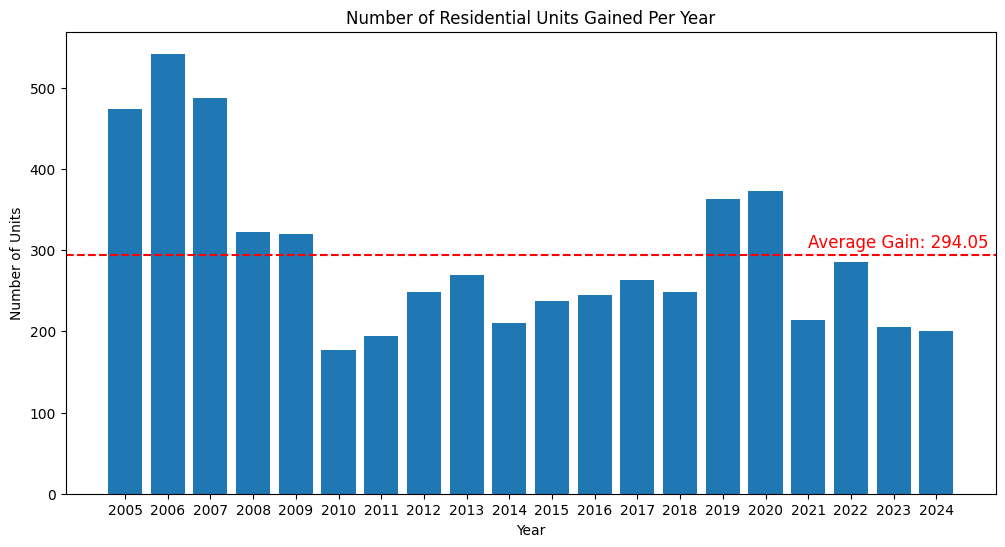

In [20]:
unit_increase_count = pd.DataFrame(unit_increase_data).transpose()

plt.figure(figsize=(12, 6))
plt.bar(unit_increase_count.index, unit_increase_count.values.flatten())

# add avg
avg = unit_increase_count.mean()[0]
plt.axhline(y=avg, color='r', linestyle='--', label='Average')
plt.text(len(unit_increase_count) - 4, avg + 10, f'Average Gain: {avg:.2f}', color='r', fontsize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Units')
plt.title('Number of Residential Units Gained Per Year')
plt.show()

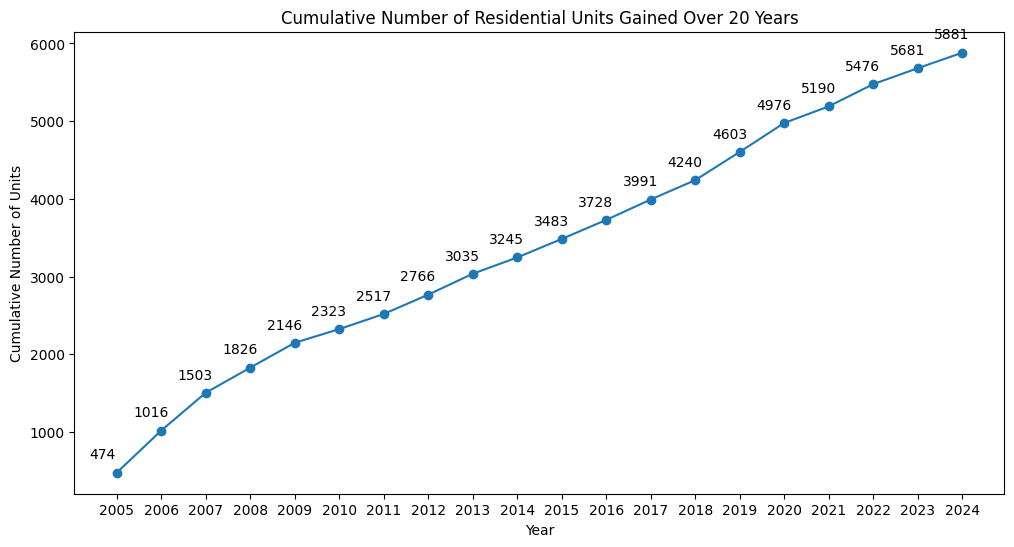

In [21]:
unit_increase_count = pd.DataFrame(unit_increase_data).transpose()

# Calculate the cumulative sum
cumulative_units = unit_increase_count.cumsum()

plt.figure(figsize=(12, 6))
plt.plot(cumulative_units.index, cumulative_units.values.flatten(), marker='o', linestyle='-')

for x, y in zip(cumulative_units.index,cumulative_units.values.flatten()):
    plt.annotate(f'{y}', xy=(x, y), xytext=(-20, 10), textcoords='offset points')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Units')
plt.title('Cumulative Number of Residential Units Gained Over 20 Years')
plt.show()

## Find how many residental units have been lost per year

In [22]:
# grab all multi family homes in 2004
units_04 = pa_2004[pa_2004['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

# grab all the multi family homes in 2004 that are not in 2005
units_05 = pa_2004[~pa_2004.PID.isin(pa_2005.PID)]
units_05 = units_05[units_05['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

# grab all the multi family homes in 2005 that are not in 2006
units_06 = pa_2005[~pa_2005.PID.isin(pa_2006.PID)]
units_06 = units_06[units_06['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

units_07 = pa_2006[~pa_2006.PID.isin(pa_2007.PID)]
units_07 = units_07[units_07['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

units_08 = pa_2007[~pa_2007.PID.isin(pa_2008.PID)]
units_08 = units_08[units_08['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

units_09 = pa_2008[~pa_2008.PID.isin(pa_2009.PID)]
units_09 = units_09[units_09['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

units_10 = pa_2009[~pa_2009.PID.isin(pa_2010.PID)]
units_10 = units_10[units_10['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

units_11 = pa_2010[~pa_2010.PID.isin(pa_2012.PID)]
units_11 = units_11[units_11['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

units_12 = pa_2011[~pa_2011.PID.isin(pa_2012.PID)]
units_12 = units_12[units_12['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

units_13 = pa_2012[~pa_2012.PID.isin(pa_2013.PID)]
units_13 = units_13[units_13['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

units_14 = pa_2013[~pa_2013.PID.isin(pa_2014.PID)]
units_14 = units_14[units_14['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

units_15 = pa_2014[~pa_2014.PID.isin(pa_2015.PID)]
units_15 = units_15[units_15['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

units_16 = pa_2015[~pa_2015.PID.isin(pa_2016.PID)]
units_16 = units_16[units_16['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

units_17 = pa_2016[~pa_2016.PID.isin(pa_2017.PID)]
units_17 = units_17[units_17['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

units_18 = pa_2017[~pa_2017.PID.isin(pa_2018.PID)]
units_18 = units_18[units_18['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

units_19 = pa_2018[~pa_2018.PID.isin(pa_2019.PID)]
units_19 = units_19[units_19['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

units_20 = pa_2019[~pa_2019.PID.isin(pa_2020.PID)]
units_20 = units_20[units_20['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

units_21 = pa_2020[~pa_2020.PID.isin(pa_2021.PID)]
units_21 = units_21[units_21['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

units_22 = pa_2021[~pa_2021.PID.isin(pa_2022.PID)]
units_22 = units_22[units_22['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

units_23 = pa_2022[~pa_2022.PID.isin(pa_2023.PID)]
units_23 = units_23[units_23['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]

units_24 = pa_2023[~pa_2023.PID.isin(pa_2024.PID)]
units_24 = units_24[units_24['LU'].isin(['R1', 'R2', 'R3', 'R4', 'RC', 'A'])]


# for each year, count the number of rows
unit_decrease_data = {
    '2005': [units_05['PID'].count()],
    '2006': [units_06['PID'].count()],
    '2007': [units_07['PID'].count()],
    '2008': [units_08['PID'].count()],
    '2009': [units_09['PID'].count()],
    '2010': [units_10['PID'].count()],
    '2011': [units_11['PID'].count()],
    '2012': [units_12['PID'].count()],
    '2013': [units_13['PID'].count()],
    '2014': [units_14['PID'].count()],
    '2015': [units_15['PID'].count()],
    '2016': [units_16['PID'].count()],
    '2017': [units_17['PID'].count()],
    '2018': [units_18['PID'].count()],
    '2019': [units_19['PID'].count()],
    '2020': [units_20['PID'].count()],
    '2021': [units_21['PID'].count()],
    '2022': [units_22['PID'].count()],
    '2023': [units_23['PID'].count()],
    '2024': [units_24['PID'].count()]
}

# number of units per year
print('Number of residental units lost that year')
print('05:', units_05['PID'].count())
print('06:', units_06['PID'].count())
print('07:', units_07['PID'].count())
print('08:', units_08['PID'].count())
print('09:', units_09['PID'].count())
print('10:', units_10['PID'].count())
print('11:', units_11['PID'].count())
print('12:', units_12['PID'].count())
print('13:', units_13['PID'].count())
print('14:', units_14['PID'].count())
print('15:', units_15['PID'].count())
print('16:', units_16['PID'].count())
print('17:', units_17['PID'].count())
print('18:', units_18['PID'].count())
print('19:', units_19['PID'].count())
print('20:', units_20['PID'].count())
print('21:', units_21['PID'].count())
print('22:', units_22['PID'].count())
print('23:', units_23['PID'].count())
print('24:', units_24['PID'].count())


Number of residental units lost that year
05: 170
06: 203
07: 190
08: 170
09: 152
10: 94
11: 89
12: 53
13: 45
14: 30
15: 84
16: 42
17: 66
18: 129
19: 37
20: 50
21: 47
22: 41
23: 61
24: 41


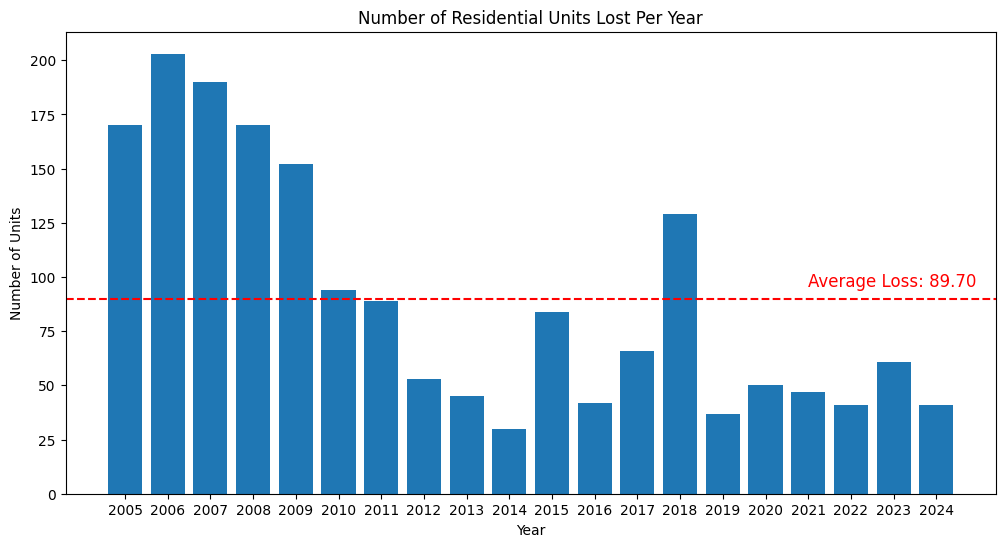

In [23]:
unit_decrease_count = pd.DataFrame(unit_decrease_data).transpose()

plt.figure(figsize=(12, 6))
plt.bar(unit_decrease_count.index, unit_decrease_count.values.flatten())

# add avg
avg = unit_decrease_count.mean()[0]
plt.axhline(y=avg, color='r', linestyle='--', label='Average')
plt.text(len(unit_decrease_count) - 4, avg + 6, f'Average Loss: {avg:.2f}', color='r', fontsize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Units')
plt.title('Number of Residential Units Lost Per Year')
plt.show()

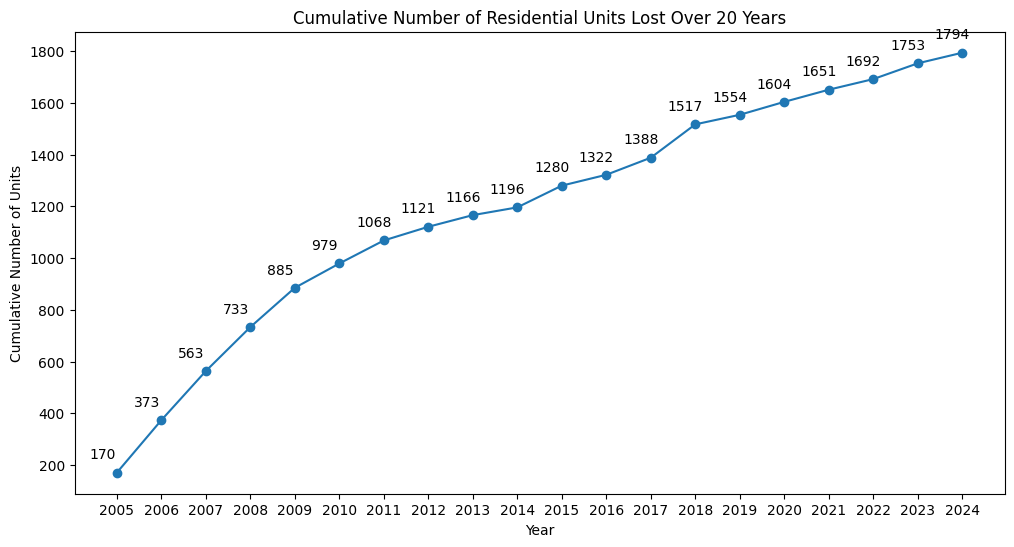

In [24]:
unit_decrease_count = pd.DataFrame(unit_decrease_data).transpose()

# Calculate the cumulative sum
cumulative_units = unit_decrease_count.cumsum()

plt.figure(figsize=(12, 6))
plt.plot(cumulative_units.index, cumulative_units.values.flatten(), marker='o', linestyle='-')

for x, y in zip(cumulative_units.index,cumulative_units.values.flatten()):
    plt.annotate(f'{y}', xy=(x, y), xytext=(-20, 10), textcoords='offset points')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Units')
plt.title('Cumulative Number of Residential Units Lost Over 20 Years')
plt.show()

## Combine findings of how many residental units have been added and lost to find if there has been a net gain or a net loss

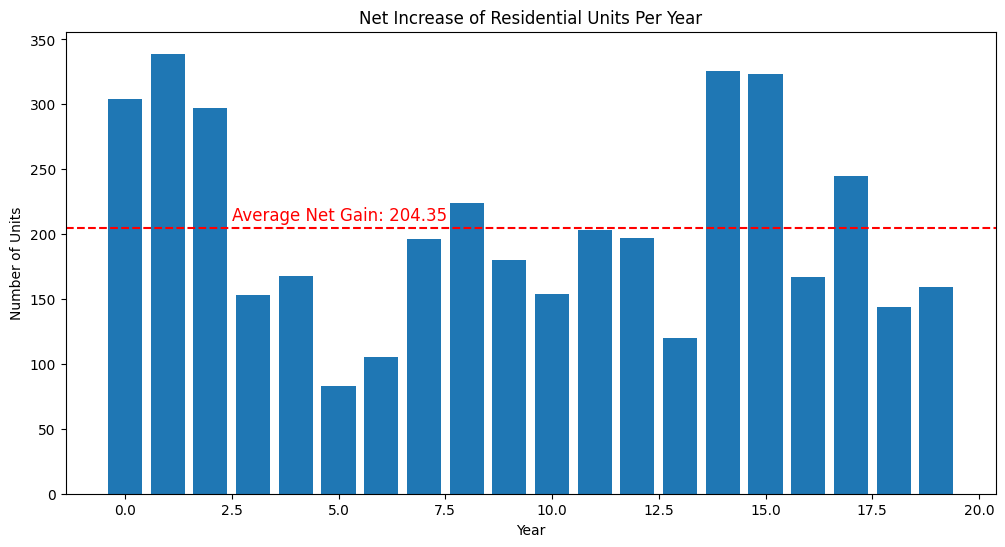

In [25]:
unit_net_increase_count = pd.DataFrame(unit_increase_count.values - unit_decrease_count.values)

plt.figure(figsize=(12, 6))
plt.bar(unit_net_increase_count.index, unit_net_increase_count.values.flatten())

# add avg
avg = unit_net_increase_count.mean()[0]
plt.axhline(y=avg, color='r', linestyle='--', label='Average')
plt.text(len(unit_net_increase_count) - 17.5, avg + 6, f'Average Net Gain: {avg:.2f}', color='r', fontsize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Units')
plt.title('Net Increase of Residential Units Per Year')
plt.show()

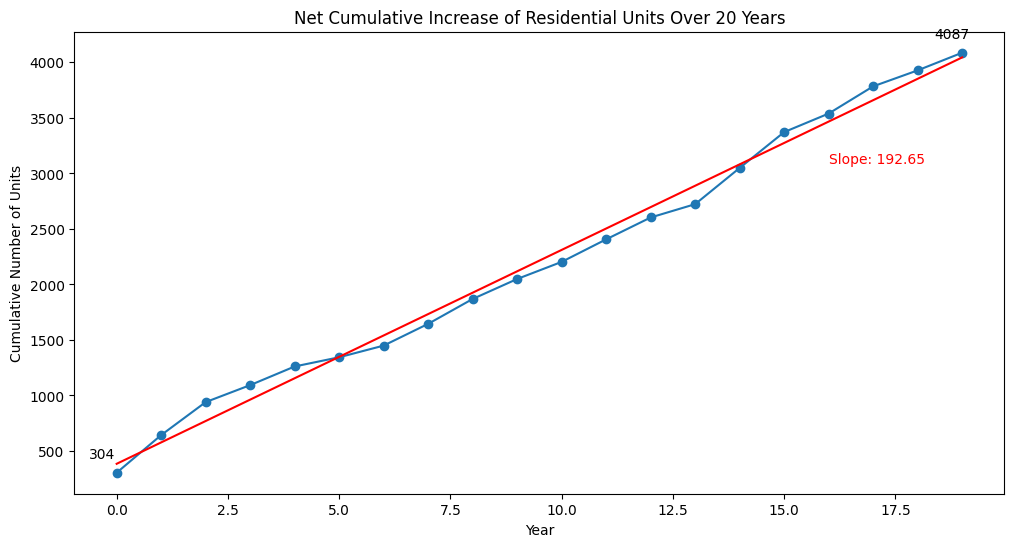

In [26]:
unit_net_increase_count = pd.DataFrame(unit_increase_count.values - unit_decrease_count.values)

net_cumulative_units = unit_net_increase_count.cumsum()

plt.figure(figsize=(12, 6))
plt.plot(net_cumulative_units.index, net_cumulative_units.values.flatten(), marker='o', linestyle='-')

slope, intercept, r_value, p_value, std_err = linregress(net_cumulative_units.index, net_cumulative_units.values.flatten())
# Plot best fit line
plt.plot(net_cumulative_units.index, slope*net_cumulative_units.index + intercept, color='red', label=f'Best Fit Line (Slope: {slope:.2f})')
# Print slope on the graph
plt.text(16, max(net_cumulative_units.values.flatten()) - 1000, f'Slope: {slope:.2f}', fontsize=10, color='red')

plt.annotate(f'{net_cumulative_units.values.flatten()[0]}', xy=(net_cumulative_units.index[0], net_cumulative_units.values.flatten()[0]), xytext=(-20, 10), textcoords='offset points')
plt.annotate(f'{net_cumulative_units.values.flatten()[-1]}', xy=(net_cumulative_units.index[-1], net_cumulative_units.values.flatten()[-1]), xytext=(-20, 10), textcoords='offset points')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Units')
plt.title('Net Cumulative Increase of Residential Units Over 20 Years')
plt.show()

## Use the year remodeled column and check land usage before and after remodel if available

In [37]:
remodel_2008 = pd.read_csv('../data/property_assessment_2008.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2009 = pd.read_csv('../data/property_assessment_2009.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2010 = pd.read_csv('../data/property_assessment_2010.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2011 = pd.read_csv('../data/property_assessment_2011.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2012 = pd.read_csv('../data/property_assessment_2012.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2013 = pd.read_csv('../data/property_assessment_2013.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2014 = pd.read_csv('../data/property_assessment_2014.csv', low_memory=False)[['Parcel_ID', 'YR_REMOD']]
remodel_2015 = pd.read_csv('../data/property_assessment_2015.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2016 = pd.read_csv('../data/property_assessment_2016.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2017 = pd.read_csv('../data/property_assessment_2017.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2018 = pd.read_csv('../data/property_assessment_2018.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2019 = pd.read_csv('../data/property_assessment_2019.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2020 = pd.read_csv('../data/property_assessment_2020.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2021 = pd.read_csv('../data/property_assessment_2021.csv', low_memory=False)[['PID', 'YR_REMODEL']]
remodel_2022 = pd.read_csv('../data/property_assessment_2022.csv', low_memory=False)[['PID', 'YR_REMODEL']]
remodel_2023 = pd.read_csv('../data/property_assessment_2023.csv', low_memory=False)[['PID', 'YR_REMODEL']]
remodel_2024 = pd.read_csv('../data/property_assessment_2024.csv', low_memory=False)[['PID', 'YR_REMODEL']]

In [38]:
# preprocess remodel data
# fix 2014 PID column name to match all others
remodel_2014.rename(columns={'Parcel_ID': 'PID'}, inplace=True)

# change year remodel column names for 21, 22, 23, and 24 to match other years
remodel_2021.rename(columns={'YR_REMODEL': 'YR_REMOD'}, inplace=True)
remodel_2022.rename(columns={'YR_REMODEL': 'YR_REMOD'}, inplace=True)
remodel_2023.rename(columns={'YR_REMODEL': 'YR_REMOD'}, inplace=True)
remodel_2024.rename(columns={'YR_REMODEL': 'YR_REMOD'}, inplace=True)

# remove underscore from PID in years 2014, 2015, 2016, and 2017 and convert to type int64
remodel_2014['PID'] = remodel_2014['PID'].astype(str).str.replace('_', '').astype(int)
remodel_2015['PID'] = remodel_2015['PID'].astype(str).str.replace('_', '').astype(int)
remodel_2016['PID'] = remodel_2016['PID'].astype(str).str.replace('_', '').astype(int)
remodel_2017['PID'] = remodel_2017['PID'].astype(str).str.replace('_', '').astype(int)


In [39]:
print('08:', remodel_2008['PID'].count())
print('09:', remodel_2009['PID'].count())
print('10:', remodel_2010['PID'].count())
print('11:', remodel_2011['PID'].count())
print('12:', remodel_2012['PID'].count())
print('13:', remodel_2013['PID'].count())
print('14:', remodel_2014['PID'].count())
print('15:', remodel_2015['PID'].count())
print('16:', remodel_2016['PID'].count())
print('17:', remodel_2017['PID'].count())
print('18:', remodel_2018['PID'].count())
print('19:', remodel_2019['PID'].count())
print('20:', remodel_2020['PID'].count())
print('21:', remodel_2021['PID'].count())
print('22:', remodel_2022['PID'].count())
print('23:', remodel_2023['PID'].count())
print('24:', remodel_2024['PID'].count())

08: 155564
09: 158092
10: 160083
11: 161261
12: 164847
13: 165608
14: 164091
15: 168115
16: 169199
17: 170910
18: 172841
19: 174668
20: 175052
21: 177091
22: 178598
23: 180627
24: 182242


In [61]:
#drop null rows
remodel_2008 = remodel_2008.dropna()
remodel_2009 = remodel_2009.dropna()
remodel_2010 = remodel_2010.dropna()
remodel_2011 = remodel_2011.dropna()
remodel_2012 = remodel_2012.dropna()
remodel_2013 = remodel_2013.dropna()
remodel_2014 = remodel_2014.dropna()
remodel_2015 = remodel_2015.dropna()
remodel_2016 = remodel_2016.dropna()
remodel_2017 = remodel_2017.dropna()
remodel_2018 = remodel_2018.dropna()
remodel_2019 = remodel_2019.dropna()
remodel_2020 = remodel_2020.dropna()
remodel_2021 = remodel_2021.dropna()
remodel_2022 = remodel_2022.dropna()
remodel_2023 = remodel_2023.dropna()
remodel_2024 = remodel_2024.dropna()

In [41]:
print('08:', remodel_2008['PID'].count())
print('09:', remodel_2009['PID'].count())
print('10:', remodel_2010['PID'].count())
print('11:', remodel_2011['PID'].count())
print('12:', remodel_2012['PID'].count())
print('13:', remodel_2013['PID'].count())
print('14:', remodel_2014['PID'].count())
print('15:', remodel_2015['PID'].count())
print('16:', remodel_2016['PID'].count())
print('17:', remodel_2017['PID'].count())
print('18:', remodel_2018['PID'].count())
print('19:', remodel_2019['PID'].count())
print('20:', remodel_2020['PID'].count())
print('21:', remodel_2021['PID'].count())
print('22:', remodel_2022['PID'].count())
print('23:', remodel_2023['PID'].count())
print('24:', remodel_2024['PID'].count())

08: 125668
09: 126630
10: 127669
11: 128015
12: 129481
13: 129736
14: 164091
15: 130772
16: 131135
17: 131370
18: 131561
19: 132872
20: 88795
21: 84939
22: 92092
23: 85400
24: 86718


In [62]:
# drop rows that have a remodel year outside of what we can check LU codes for
remodel_2008 = remodel_2008[(remodel_2008['YR_REMOD'] >= 2005) & (remodel_2008['YR_REMOD'] <= 2023)] 
remodel_2009 = remodel_2009[(remodel_2009['YR_REMOD'] >= 2005) & (remodel_2009['YR_REMOD'] <= 2023)] 
remodel_2010 = remodel_2010[(remodel_2010['YR_REMOD'] >= 2005) & (remodel_2010['YR_REMOD'] <= 2023)] 
remodel_2011 = remodel_2011[(remodel_2011['YR_REMOD'] >= 2005) & (remodel_2011['YR_REMOD'] <= 2023)] 
remodel_2012 = remodel_2012[(remodel_2012['YR_REMOD'] >= 2005) & (remodel_2012['YR_REMOD'] <= 2023)] 
remodel_2013 = remodel_2013[(remodel_2013['YR_REMOD'] >= 2005) & (remodel_2013['YR_REMOD'] <= 2023)] 
remodel_2014 = remodel_2014[(remodel_2014['YR_REMOD'] >= 2005) & (remodel_2014['YR_REMOD'] <= 2023)] 
remodel_2015 = remodel_2015[(remodel_2015['YR_REMOD'] >= 2005) & (remodel_2015['YR_REMOD'] <= 2023)] 
remodel_2016 = remodel_2016[(remodel_2016['YR_REMOD'] >= 2005) & (remodel_2016['YR_REMOD'] <= 2023)] 
remodel_2017 = remodel_2017[(remodel_2017['YR_REMOD'] >= 2005) & (remodel_2017['YR_REMOD'] <= 2023)] 
remodel_2018 = remodel_2018[(remodel_2018['YR_REMOD'] >= 2005) & (remodel_2018['YR_REMOD'] <= 2023)] 
remodel_2019 = remodel_2019[(remodel_2019['YR_REMOD'] >= 2005) & (remodel_2019['YR_REMOD'] <= 2023)] 
remodel_2020 = remodel_2020[(remodel_2020['YR_REMOD'] >= 2005) & (remodel_2020['YR_REMOD'] <= 2023)] 
remodel_2021 = remodel_2021[(remodel_2021['YR_REMOD'] >= 2005) & (remodel_2021['YR_REMOD'] <= 2023)] 
remodel_2022 = remodel_2022[(remodel_2022['YR_REMOD'] >= 2005) & (remodel_2022['YR_REMOD'] <= 2023)] 
remodel_2023 = remodel_2023[(remodel_2023['YR_REMOD'] >= 2005) & (remodel_2023['YR_REMOD'] <= 2023)] 
remodel_2024 = remodel_2024[(remodel_2024['YR_REMOD'] >= 2005) & (remodel_2024['YR_REMOD'] <= 2023)] 

In [63]:
print('08:', remodel_2008['PID'].count())
print('09:', remodel_2009['PID'].count())
print('10:', remodel_2010['PID'].count())
print('11:', remodel_2011['PID'].count())
print('12:', remodel_2012['PID'].count())
print('13:', remodel_2013['PID'].count())
print('14:', remodel_2014['PID'].count())
print('15:', remodel_2015['PID'].count())
print('16:', remodel_2016['PID'].count())
print('17:', remodel_2017['PID'].count())
print('18:', remodel_2018['PID'].count())
print('19:', remodel_2019['PID'].count())
print('20:', remodel_2020['PID'].count())
print('21:', remodel_2021['PID'].count())
print('22:', remodel_2022['PID'].count())
print('23:', remodel_2023['PID'].count())
print('24:', remodel_2024['PID'].count())

08: 6847
09: 8860
10: 11647
11: 13727
12: 15646
13: 17707
14: 19830
15: 22154
16: 24380
17: 27456
18: 30369
19: 34276
20: 37069
21: 38342
22: 42687
23: 41750
24: 43998


In [59]:
# combine all available data into one data frame
remodel_df = pd.concat([remodel_2008, remodel_2009, remodel_2010, remodel_2011, remodel_2012, remodel_2013, remodel_2014, remodel_2015, remodel_2016, remodel_2017, remodel_2018, remodel_2019, remodel_2020, remodel_2021, remodel_2022, remodel_2023, remodel_2024])

print(remodel_df['PID'].count())

436745


In [64]:
# drop any duplicate rows
remodel_df = remodel_df.drop_duplicates(subset='YR_REMOD', keep='first')
remodel_df = remodel_df.reset_index(drop=True)

print(remodel_df['PID'].count())

19


In [65]:
remodel_df.head(25)

,PID,YR_REMOD
0,100153000,2005.0
1,100210000,2006.0
2,200867000,2007.0
3,106329000,2008.0
4,102362000,2009.0
5,1900806000,2010.0
6,106078000,2011.0
7,103617000,2012.0
8,2100125014,2013.0
9,1200080000,2014.0
